Module 6 Assignment: Analyzing Sales Data with Pandas

Easy:

1. How many unique customers are in the dataset?

In [1]:
import pandas as pd

file = 'fct_invoice.csv'
dataframe = pd.read_csv(file)
unique_customers = dataframe['customer_id'].nunique()
print("There are " + str(unique_customers) + " customers in the dataset.")

There are 5191 customers in the dataset.


2. What are the different categories of products available? How many unique categories are there?

In [2]:
#different categories of products

import pandas as pd

file = 'fct_invoice.csv'
dataframe = pd.read_csv(file)
prod_categories = dataframe['category'].unique()

for category in prod_categories:
    categories = ', '.join(prod_categories)

print("The categories of products available are as follows: " + categories)


#unique categories

num_categories = dataframe['category'].nunique()
print("Therefore, there are " + str(num_categories) +" unique categories in the dataset.")

The categories of products available are as follows: Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir
Therefore, there are 8 unique categories in the dataset.


3. Which payment method is the most popular? How many times was it used?

In [3]:
import pandas as pd

file = 'fct_invoice.csv'
dataframe = pd.read_csv(file)
payment_counts = dataframe['payment_method'].value_counts()
mostpop_payment = payment_counts.idxmax()
print ("The most popular payment method is " + str(mostpop_payment) + ".")
       
mostpop_count = len(dataframe[dataframe['payment_method'] == mostpop_payment])
print ("It was used " + str(mostpop_count) + " times.")

The most popular payment method is Cash.
It was used 44447 times.


Medium

1. What are the three most popular categories, by total sales?

In [4]:
import pandas as pd

file = 'fct_invoice.csv'
dataframe = pd.read_csv(file)
dataframe['Total Sales'] = dataframe['quantity'] * dataframe['price']
category_sales = dataframe.groupby('category')['Total Sales'].sum()
top_categories = category_sales.nlargest(3)

print("The three most popular categories by total sales are:")
print(top_categories)

The three most popular categories by total sales are:
category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: Total Sales, dtype: float64


2. What are the total sales attributed to customers over the age of 45?

In [5]:
import pandas as pd

file = 'fct_invoice.csv'
file2 = 'dim_customer.json'
dfcsv = pd.read_csv(file)
dfjson = pd.read_json(file2)
dfcsv['Total Sales'] = dfcsv['quantity'] * dfcsv['price']

dfjson.rename(columns={"id":"customer_id"})
merged_df = pd.merge(dfcsv,dfjson,left_on="customer_id",right_on="id")
over_45 = merged_df.loc[merged_df['age']>45]
total_sales = over_45.sum()['Total Sales']

print("Total Sales for Customers over the Age of 45:", total_sales)

Total Sales for Customers over the Age of 45: 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns?

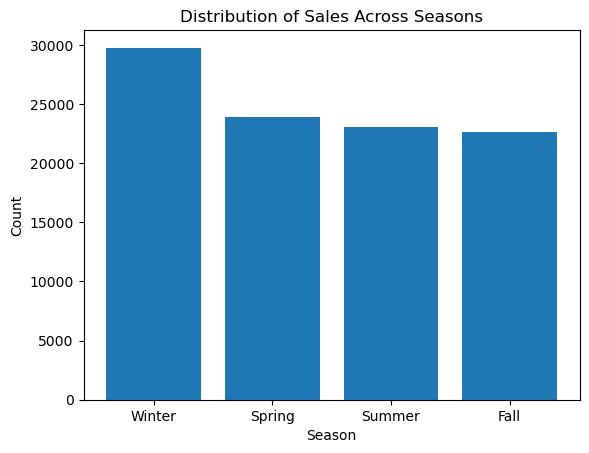

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file = 'fct_invoice.csv'
file2 = 'dim_customer.json'
dfcsv = pd.read_csv(file)
dfjson = pd.read_json(file2)

merged_df = pd.merge(dfcsv,dfjson,left_on="customer_id",right_on="id")
merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'], format='%d/%m/%Y')  # Convert to datetime
merged_df['month'] = merged_df['invoice_date'].dt.month


winter = merged_df.loc[(merged_df['month'] == 12) | (merged_df['month'] <= 2)].index
merged_df.loc[winter, 'season'] = 'Winter'

spring = merged_df.loc[(merged_df['month'] >= 3) & (merged_df['month'] <= 5)].index
merged_df.loc[spring, 'season'] = 'Spring'

summer = merged_df[(merged_df['month'] >= 6) & (merged_df['month'] <= 8)].index
merged_df.loc[summer, 'season'] = 'Summer'

fall = merged_df[(merged_df['month'] >= 9) & (merged_df['month'] <= 11)].index
merged_df.loc[fall, 'season'] = 'Fall'

season_counts = merged_df['season'].value_counts()

plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Distribution of Sales Across Seasons')
plt.show()

Graph Analysis:

Among the four seasons, winter had the most invoices. This may be caused by the holidays that fall within the winter season or "the season of gift-giving," like Christmas and New Year. Hence, people tend to buy more products during this period.

Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [3]:
import pandas as pd

file = 'fct_invoice.csv'
file2 = 'dim_customer.json'
dfcsv = pd.read_csv(file)
dfjson = pd.read_json(file2)

merged_df = pd.merge(dfcsv,dfjson,left_on="customer_id",right_on="id")
total_sales = merged_df['quantity'] * merged_df['price']
merged_df['total_sales'] = total_sales

decades = pd.cut(merged_df['age'],bins=range(10, 101, 10),right=False)
merged_df.pivot_table(index="category",columns=decades,values="total_sales",aggfunc="sum")

age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)"
category,,,,,,,,,
Books,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0.0
Clothing,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0.0
Cosmetics,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0.0
Food & Beverage,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0.0
Shoes,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0.0
Souvenir,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0.0
Technology,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0.0
Toys,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0.0
